In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
fear_greed_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

In [5]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['classification'] = fear_greed_df['classification'].str.strip()

In [7]:
fear_greed_df = fear_greed_df[['date', 'classification', 'value']]
fear_greed_df.rename(columns={'classification': 'Sentiment', 'value': 'SentimentValue'}, inplace=True)

In [9]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date

In [13]:
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df['Fee'] = pd.to_numeric(trader_df['Fee'], errors='coerce')
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [15]:
merged_df = pd.merge(trader_df, fear_greed_df, on='date', how='left')

C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\3472722485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl_sentiment, x='Sentiment', y='Closed PnL', palette='coolwarm')


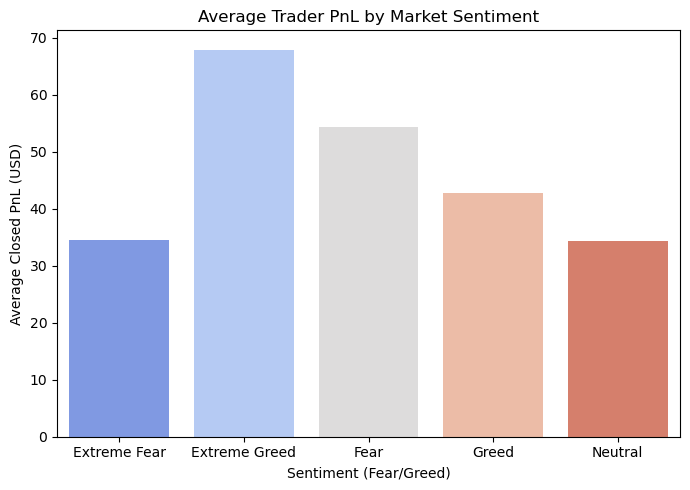

In [17]:
#1. Average PnL by Sentiment
avg_pnl_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_pnl_sentiment, x='Sentiment', y='Closed PnL', palette='coolwarm')
plt.title("Average Trader PnL by Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.xlabel("Sentiment (Fear/Greed)")
plt.tight_layout()
plt.show()

C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\871894148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trade_counts, x='Sentiment', y='Trade Count', palette='viridis')


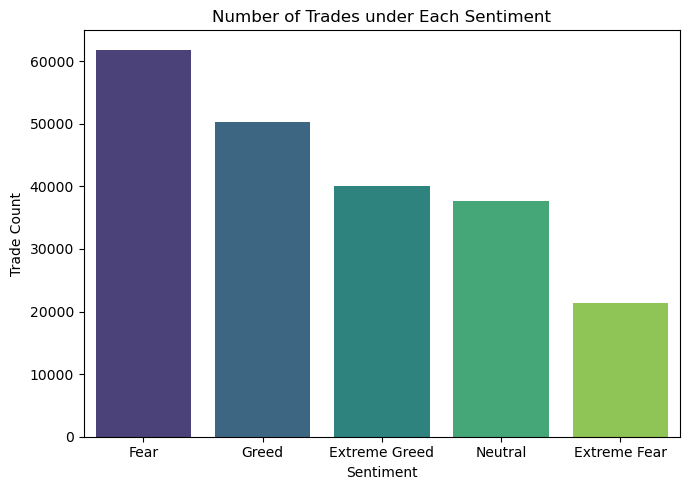

In [19]:
# 2. Total Trades by Sentiment
trade_counts = merged_df['Sentiment'].value_counts().reset_index()
trade_counts.columns = ['Sentiment', 'Trade Count']
plt.figure(figsize=(7, 5))
sns.barplot(data=trade_counts, x='Sentiment', y='Trade Count', palette='viridis')
plt.title("Number of Trades under Each Sentiment")
plt.ylabel("Trade Count")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\2228992738.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_rate, x='Sentiment', y='Profitability Rate', palette='Set2')


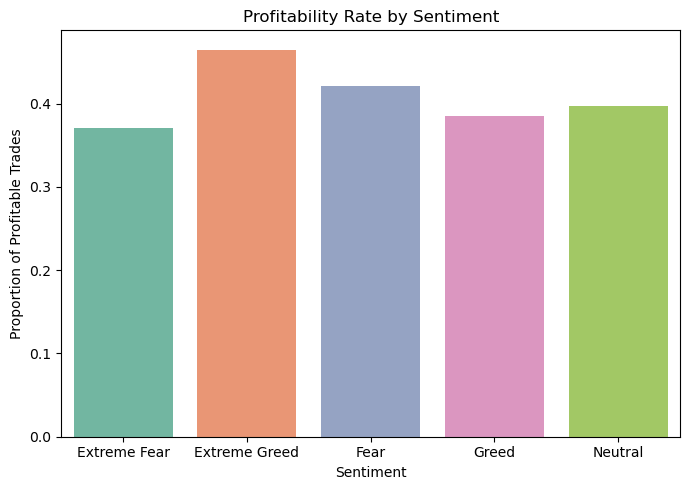

In [21]:
# 3. Profitability Rate by Sentiment
merged_df['Is_Profit'] = merged_df['Closed PnL'] > 0
profit_rate = merged_df.groupby('Sentiment')['Is_Profit'].mean().reset_index()
profit_rate.columns = ['Sentiment', 'Profitability Rate']
plt.figure(figsize=(7, 5))
sns.barplot(data=profit_rate, x='Sentiment', y='Profitability Rate', palette='Set2')
plt.title("Profitability Rate by Sentiment")
plt.ylabel("Proportion of Profitable Trades")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\2522799482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fee_analysis, x='Sentiment', y='Fee', palette='Set1')


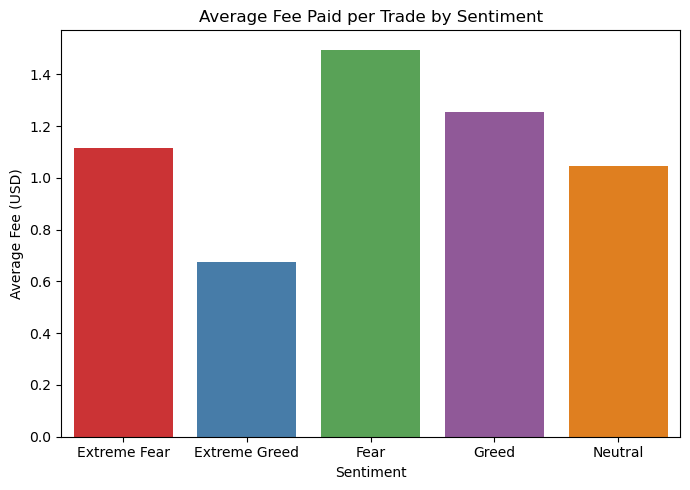

In [23]:
# 4. Average Fee Paid by Sentiment
fee_analysis = merged_df.groupby('Sentiment')['Fee'].mean().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=fee_analysis, x='Sentiment', y='Fee', palette='Set1')
plt.title("Average Fee Paid per Trade by Sentiment")
plt.ylabel("Average Fee (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\2376624985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL', palette='cool')


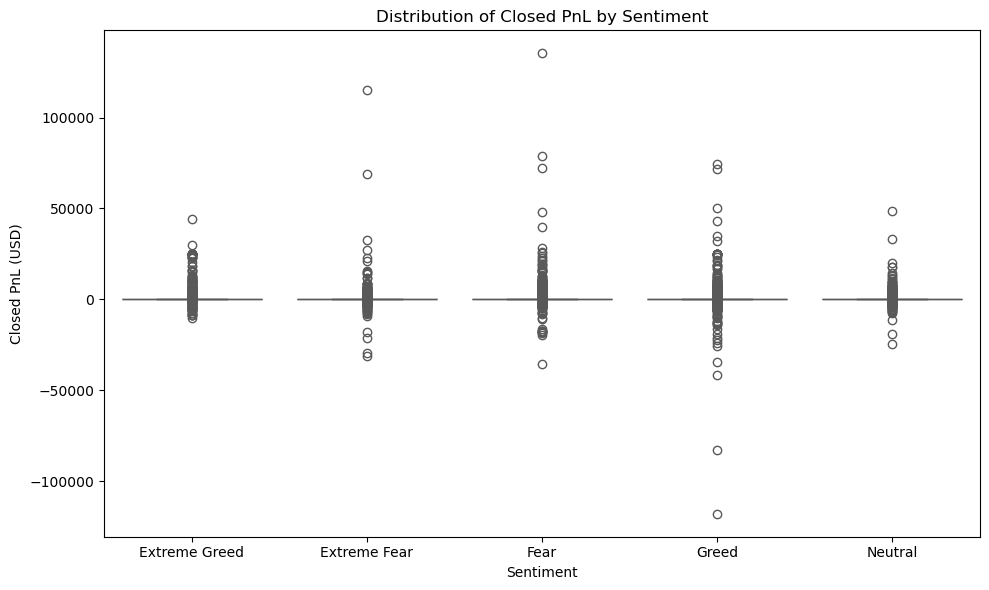

In [25]:
# 5. Distribution of PnL
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL', palette='cool')
plt.title("Distribution of Closed PnL by Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()

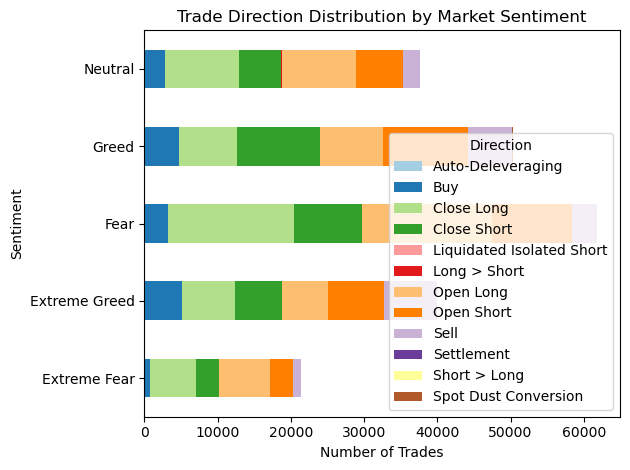

In [41]:
# 1.Trade Direction vs Sentiment
direction_dist.plot(kind='barh', stacked=True, colormap='Paired')
plt.title("Trade Direction Distribution by Market Sentiment")
plt.xlabel("Number of Trades")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()




Average Trade Size by Sentiment:
Sentiment
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

Average Start Position by Sentiment:
Sentiment
Extreme Fear      -2322.304587
Extreme Greed     19518.990812
Fear               8709.824822
Greed           -151088.546635
Neutral             144.002263
Name: Start Position, dtype: float64


C:\Users\yuvan\AppData\Local\Temp\ipykernel_6096\4132435848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='pastel')


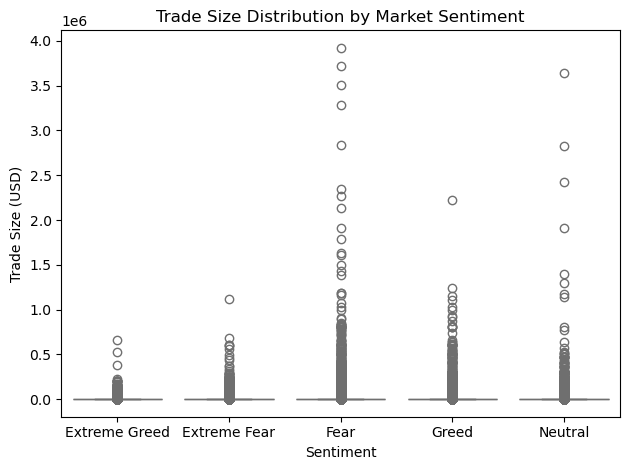

In [29]:
# 2.Trader Behavior by Sentiment (Size USD and Start Position)

print("\nAverage Trade Size by Sentiment:")
print(merged_df.groupby('Sentiment')['Size USD'].mean())
print("\nAverage Start Position by Sentiment:")
print(merged_df.groupby('Sentiment')['Start Position'].mean())
sns.boxplot(data=merged_df, x='Sentiment', y='Size USD', palette='pastel')
plt.title("Trade Size Distribution by Market Sentiment")
plt.ylabel("Trade Size (USD)")
plt.tight_layout()
plt.show()

In [31]:
    # 3. Account-Level Profitability

account_pnl = merged_df.groupby(['Account', 'Sentiment'])['Closed PnL'].sum().unstack().fillna(0)

account_pnl['Greed-Better'] = account_pnl.get('Greed', 0) > account_pnl.get('Fear', 0)

greed_better_count = account_pnl['Greed-Better'].value_counts()
print("\nNumber of accounts that perform better under each sentiment:")
print(greed_better_count)
print("\nTop 5 accounts with highest PnL under Greed:")
print(account_pnl.sort_values(by='Greed', ascending=False).head())


Number of accounts that perform better under each sentiment:
Greed-Better
True     17
False    15
Name: count, dtype: int64

Top 5 accounts with highest PnL under Greed:
Sentiment                                    Extreme Fear  Extreme Greed  \
Account                                                                    
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    9544.906134   1.105305e+06   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd   33980.000000   0.000000e+00   
0x083384f897ee0f19899168e3b1bec365f52a9012  124769.221441  -4.028234e+04   
0xbee1707d6b44d4d52bfe19e41f8a828645437aab   30774.092128   4.788115e+05   
0x430f09841d65beb3f27765503d0f850b8bce7713       0.000000   1.242849e+05   

Sentiment                                           Fear          Greed  \
Account                                                                   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  9.316516e+04  534058.236330   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd -5.821975e+04  453595.318176

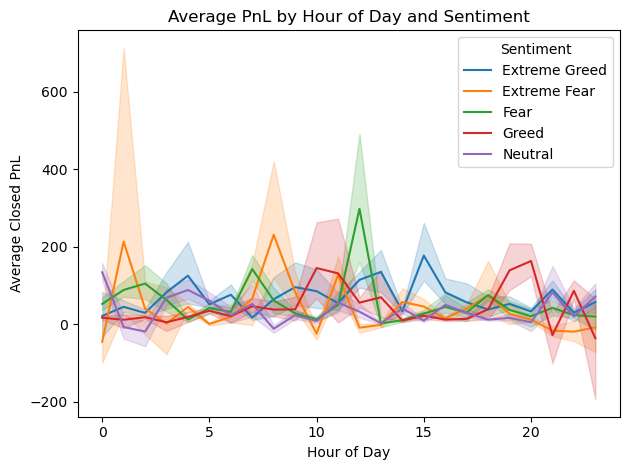

In [35]:
# 5.Time-of-Day or Day-of-Week Analysis

merged_df['hour'] = merged_df['Timestamp IST'].dt.hour
sns.lineplot(data=merged_df, x='hour', y='Closed PnL', hue='Sentiment', estimator='mean')
plt.title("Average PnL by Hour of Day and Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()

In [44]:
merged_df.to_csv("merged_trader_sentiment_data.csv", index=False)